<a href="https://colab.research.google.com/github/Pavadareni/AI_Training/blob/main/Image_Captioning/Image_Captioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter '1' to process a single image or '2' to process a directory: 1
Enter the image file path: 1/th.jpg


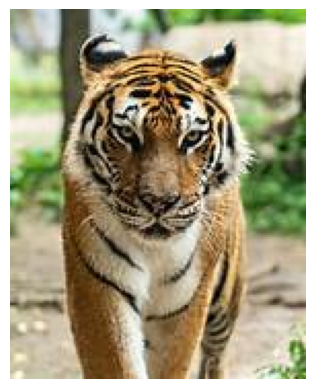

Caption for the image: a tiger walking across a dirt path


In [ ]:
import os
import matplotlib.pyplot as plt
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

def generate_caption(image_path):
    image = Image.open(image_path).convert("RGB")

    plt.imshow(image)
    plt.axis('off')
    plt.show()
    inputs = processor(image, return_tensors="pt")

    out = model.generate(**inputs)

    caption = processor.decode(out[0], skip_special_tokens=True)
    return caption

def generate_captions_for_directory(directory_path):

    files = os.listdir(directory_path)

    image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    captions = {}
    for image_file in image_files:
        image_path = os.path.join(directory_path, image_file)
        caption = generate_caption(image_path)
        captions[image_file] = caption
        print(f"Caption for {image_file}: {caption}")

    return captions


def main():
    user_input = input("Enter '1' to process a single image or '2' to process a directory: ").strip()

    if user_input == '1':
        image_path = input("Enter the image file path: ").strip()
        caption = generate_caption(image_path)
        print(f"Caption for the image: {caption}")

    elif user_input == '2':
        directory_path = input("Enter the directory path containing images: ").strip()
        if os.path.exists(directory_path):
            captions = generate_captions_for_directory(directory_path)
            print("\nGenerated Captions for All Images:")
            for image_name, caption in captions.items():
                print(f"{image_name}: {caption}")
        else:
            print("Invalid directory path.")

    else:
        print("Invalid input. Please enter '1' or '2'.")

if __name__ == "__main__":
    main()
